In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import enum
from Py.BS import TypeOptionVanilla
import pandas as pd
from Py.Market import *
from Py.ResultSimulation import *
from Py.BlackScholes import *
from Py.Heston import *
from Py.CalibrationProduct import *
from Py.VanillaOptionProduct import *

from Py.VanillaOptionPricer import *
from Py.MCSensi import *

### Create Market

In [3]:
spot = 100
marketObj = Market(spot)
marketObj.initBlack(r= 0.00,repo = 0.000,vol = 0.2)

### Create Model for Pricing

In [4]:
hestonObj = Heston(marketObj,rho = -0.7,Vo = 0.2,nu=0.7)
bsModel = BlackScholesModel(marketObj,sigma= 0.2)

##### Set For calibration

In [5]:
listK = [30,80,100,110,120]
listT = [1,2]
So = 100
listCalibrationProducts = []

for K in listK:
    
    sens = 1 if K <=So else -1
    for T in listT:        
        listCalibrationProducts.append(VanillaProduct(K,T,marketObj,sens))

In [9]:
hestonObj.calibrate(listCalibrationProducts,verbose=1,listParamToFix=[],maxIter=100)

The maximum number of function evaluations is exceeded.
Number of iterations: 100, function evaluations: 714, CG iterations: 332, optimality: 8.52e-07, constraint violation: 0.00e+00, execution time: 4.1e+01 s.


In [10]:
hestonObj.printParams()

{'kappa': 4.193698665590299,
 'theta': 0.04000256008482871,
 'Vo': 0.040012620520357374,
 'nu': 0.02914368208798201,
 'rho': 0.0007301511621102556}

##### Check Calibration

In [14]:
model = hestonObj

In [15]:
[((model.modelPrice(u)-u.value)/u.value)*10000 for u in listCalibrationProducts]

[3.0630482276908906e-08,
 0.00010988578047619804,
 0.13431455611764884,
 0.05468509049351113,
 -0.36332787757195595,
 -0.149799582052823,
 -0.04980615476729678,
 -0.03412155957945579,
 0.13945648105747438,
 0.0630663647344224]

### Create European Put product and Price

In [5]:
maturity = 5
strike = 100
typeOption = TypeOptionVanilla.Put
Nominal = 1

In [6]:
vanillaOptionProduct = VanillaOptionProduct(maturity = maturity,
                                            typeOption =typeOption, 
                                            strike = strike,                                            
                                            Nominal = Nominal )

0.0001 is being treated
0.0002 is being treated
0.0005 is being treated
0.001 is being treated
0.005 is being treated
0.007 is being treated
0.01 is being treated
0.02 is being treated
0.05 is being treated
0.1 is being treated
0.2 is being treated
0.3 is being treated
0.5 is being treated
0.6 is being treated
0.7 is being treated
0.8 is being treated
1.0 is being treated
1.2 is being treated
1.4 is being treated
1.7 is being treated
2 is being treated
2.5 is being treated
3 is being treated
3.5 is being treated
4 is being treated
4.5 is being treated
5 is being treated
5.5 is being treated
6 is being treated
6.5 is being treated
7 is being treated
7.5 is being treated
8 is being treated
8.5 is being treated
26.57665252685547


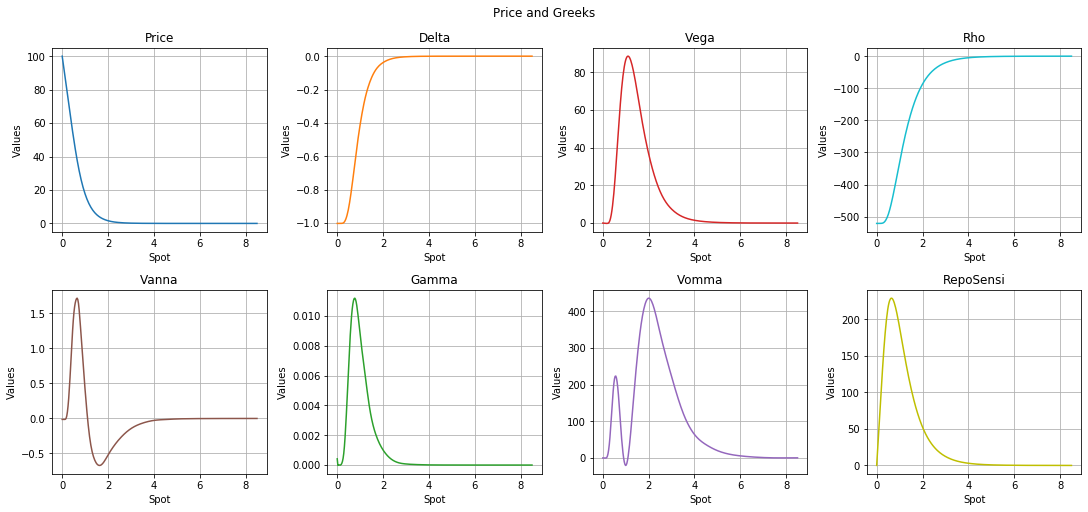

In [7]:
#listSpots=[0.1,0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3,1.4, 1.5,1.7,2,2.5,3]
sensiEngine = GenerateMCSensi(vanillaOptionProduct,VanillaOptionPricer,bsModel,nbSim = 100000,discretStep = Frequency.AtMaturity)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.0001,0.0002,0.0005,0.001,0.005,0.007,0.01,0.02,0.05,0.1,0.2,0.3,0.5, 0.6,0.7,0.8, 1.0,1.2,1.4,1.7,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5])
mcSensiPlot(resSensi)

In [10]:
#resSensi